<a href="https://colab.research.google.com/github/kaliappan01/Exploring_ML_models/blob/main/Dimension_reductionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality Reduction** is simply reducing the number of features (columns) while retaining maximum information.  
Advantages 
- Reduction in computation cost & storage
- Removes redundunt features

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE,Isomap
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score,homogeneity_score, completeness_score
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
people = fetch_lfw_people(min_faces_per_person = 20,resize = 0.7)
print(people.DESCR) 

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [3]:
img_shape = people.images[0].shape 

In [4]:
people.images.shape

(3023, 87, 65)

In [5]:
people.target_names[people.target[0]]

'Winona Ryder'

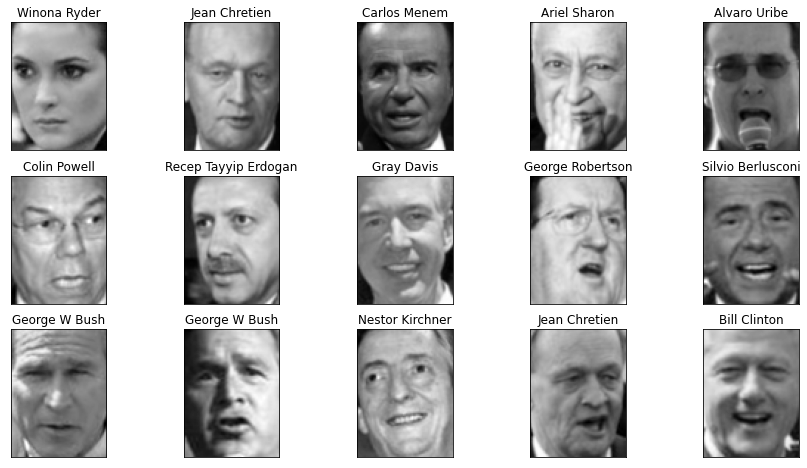

In [6]:
fig, axes = plt.subplots(3,5,figsize = (15, 8),subplot_kw=dict(xticks=[],yticks=[]))
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image, cmap="gray")
  ax.set_title(people.target_names[target])

In [7]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(people.target_names,counts)):
  print("{0:25} {1:3}".format(name,count),end = ' ')
  if (i+1)%3 ==0:
    print()

                       39 Alejandro Toledo                        35 Alvaro Uribe                        21 Amelie Mauresmo 
                       36 Andre Agassi                        20 Angelina Jolie                        77 Ariel Sharon 
                       42 Arnold Schwarzenegger                        24 Atal Bihari Vajpayee                        29 Bill Clinton 
                       21 Carlos Menem                       236 Colin Powell                        31 David Beckham 
                      121 Donald Rumsfeld                        22 George Robertson                       530 George W Bush 
                      109 Gerhard Schroeder                        44 Gloria Macapagal Arroyo                        26 Gray Davis 
                       30 Guillermo Coria                        22 Hamid Karzai                        39 Hans Blix 
                       71 Hugo Chavez                        20 Igor Ivanov                        28 Jack Straw 
           

Text(0, 0.5, 'Cumulative variance')

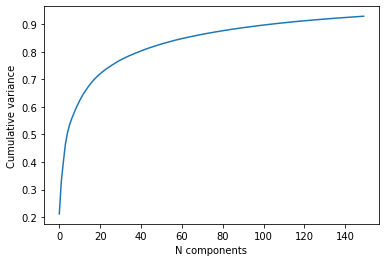

In [8]:
pca = PCA(n_components = 150).fit(people.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("N components")
plt.ylabel("Cumulative variance")

Principal Component Analysis
- This technique uses eigen values & eigen vectors to filter out the components which account for the maximum variance in the data
- Alternatively uses SVD(single value decomposition)

In [9]:
pca_n100 = PCA(n_components = 100, whiten = True, random_state = True)
data_scaled = people.data/255
data_pca = pca_n100.fit_transform(data_scaled)

In [10]:
images_retransformed= pca_n100.inverse_transform(data_pca)
images_rescaled = images_retransformed*255
images_recovered = [image.reshape(img_shape) for image in images_rescaled]

The  PCA transformation is reversible  
We attempt to recreate the images from their reduced version

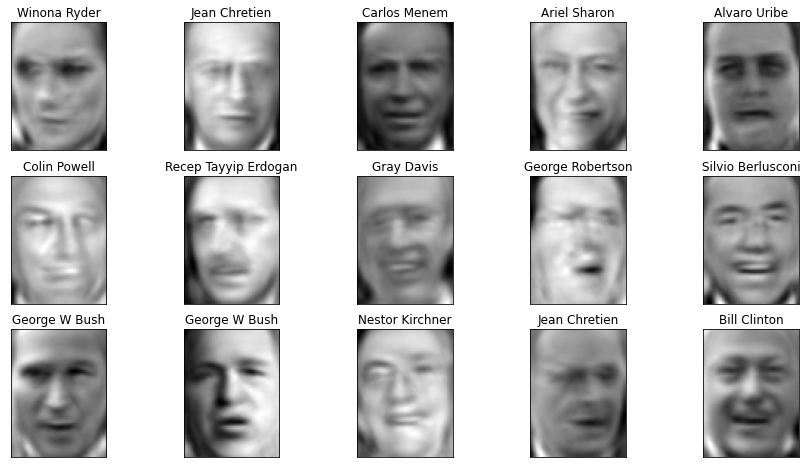

In [11]:
fig, axes = plt.subplots(3,5,figsize = (15, 8),subplot_kw=dict(xticks=[],yticks=[]))
for target, image, ax in zip(people.target, images_recovered, axes.ravel()):
  ax.imshow(image, cmap="gray")
  ax.set_title(people.target_names[target])

We observe that the recreated images have lower resolution
These are images are recreated from the 100 components which account to nearly 90% of the data variance 
The extra components are discarded by PCA so they are lost in this technique of dimension reductionality

In [12]:
tsne = TSNE(random_state = 42)
img_tsne = tsne.fit_transform(people.data)

**t - Distributed Stochaistic Neighbor Embedding**  
- In this method the dimensions are reduced to 2
- Attempts to find a 2-D representation of the data that preserves the distance between the data points as best as possible

In [13]:
img_tsne.shape

(3023, 2)

In [14]:
def display_2d_component_names(model, selected,dataobj):
  colors = ["#2F4F4F","#8B008B","#7FFF00","#00FFFF","#00FF7F","#FF00FF","#FF0000","#FF1493"
  ,"#8A2BE2","#7FFFD4","#D2691E	"]
  plt.figure(figsize=(14,14))
  plt.xlim(model[:,0].min(),model[:,0].max()+1)
  plt.ylim(model[:,1].min(),model[:,1].max()+1)
  for i in range(len(dataobj.data)):
    cindex = dataobj.target[i]%len(selected)
    if dataobj.target[i] not in selected:
      continue
    plt.text(model[i,0],model[i,1],str(dataobj.target_names[dataobj.target[i]]),color = colors[cindex],fontdict = {'weight':'bold','size':9})

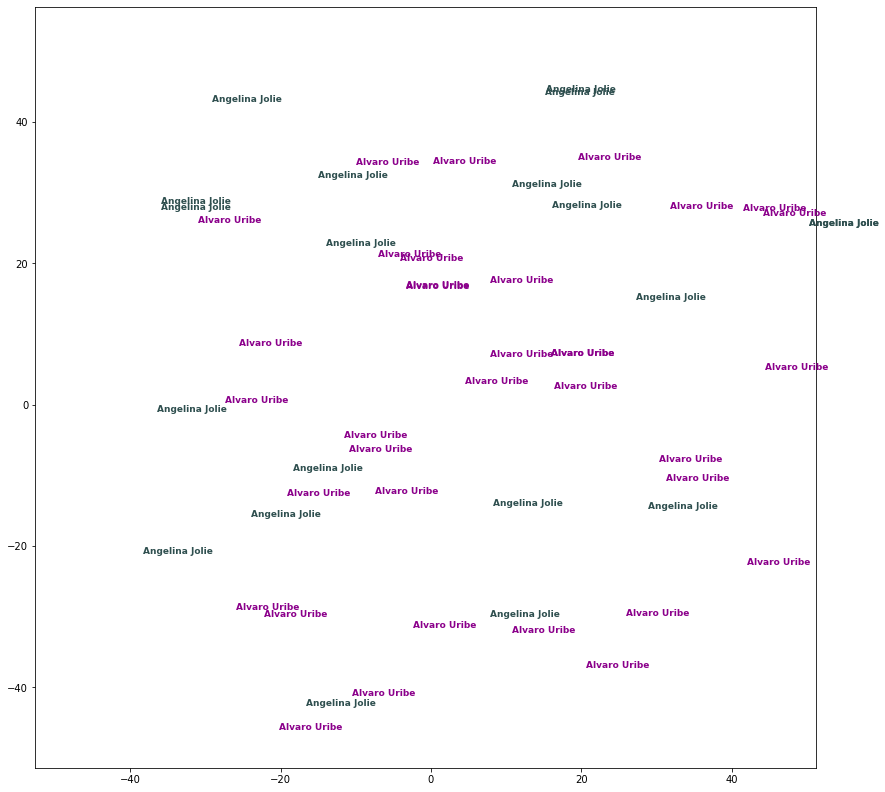

In [15]:
display_2d_component_names(img_tsne,(4,1),people)

In [16]:
iso =Isomap(n_components = 2)
img_iso = iso.fit_transform(people.data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


**ISOMAP**  
- This is a graph based technique
- Connects each instance to its K-nearest neighbor
- Uses Djisktra algorithmn to calculate the shortest distance between datapoints to assign clusters

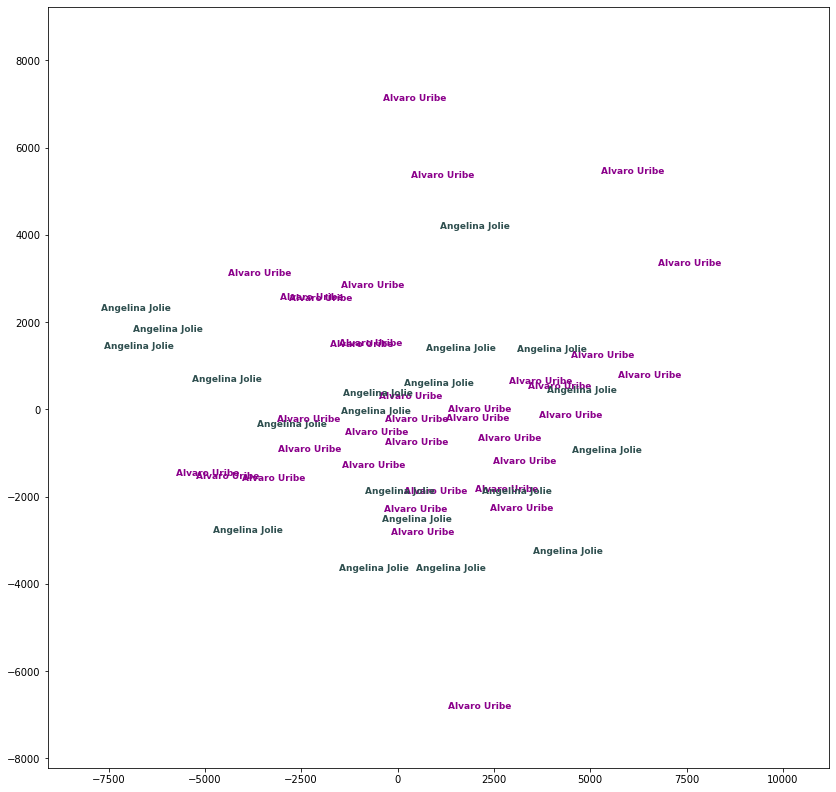

In [17]:
display_2d_component_names(img_iso,(4,1),people)

MNIST DIGITS DATASET

In [18]:
from sklearn.datasets import load_digits

digits_data = load_digits()
print(digits_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

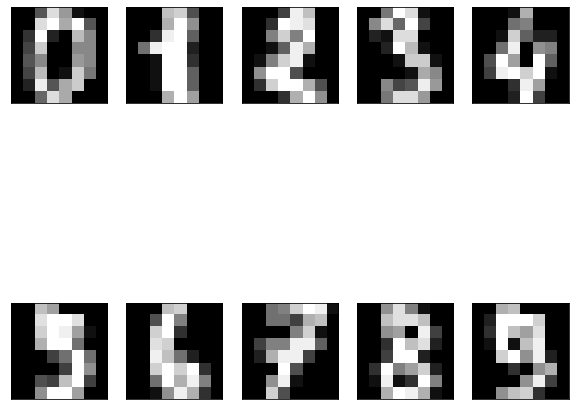

In [19]:
fig,axes = plt.subplots(2,5,figsize = (10,10),subplot_kw=dict(xticks=[],yticks=[]))
for img,ax in zip(digits_data.images,axes.ravel()):
  ax.imshow(img,cmap="gray")

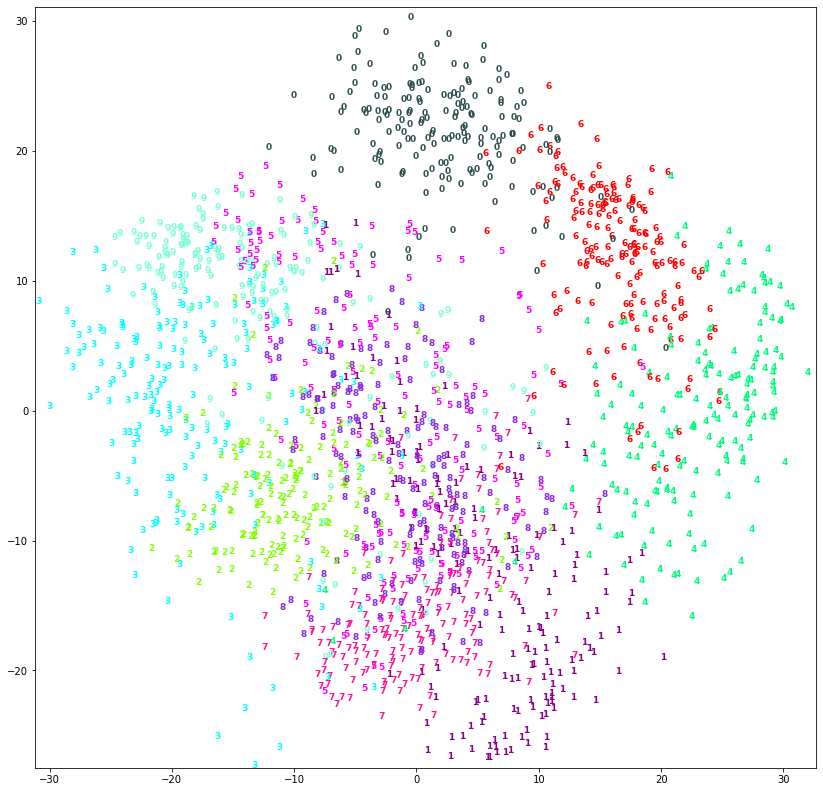

In [20]:
pca_mnist = PCA(n_components = 2)
pca_mnist.fit(digits_data.data)
digits_pca = pca_mnist.transform(digits_data.data)
display_2d_component_names(digits_pca, (0,1,2,3,4,5,6,7,8,9),digits_data)

In [28]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 10)
pca_pred = kmeans1.fit_predict(digits_pca)

In [36]:
from scipy.stats import mode
def cluster_accuracy(target, clusters, numClasses):
  labels = np.zeros_like(clusters)
  for i in range(numClasses):
    mask = (clusters == i)
    labels[mask] = mode(target[mask])[0]
  print("Accuracy Score : {} \nHomogeneity Score : {}\nCompleteness Score : {}".format(accuracy_score(target, labels),homogeneity_score(target, labels),completeness_score(target, labels)))
  # return accuracy_score(target, labels),homogeneity_score(target, labels),completeness_score(target, labels)

In [37]:
cluster_accuracy(digits_data.target,pca_pred,10)

Accuracy Score : 0.6087924318308292 
Homogeneity Score : 0.5138668631518916
Completeness Score : 0.5583461541968618


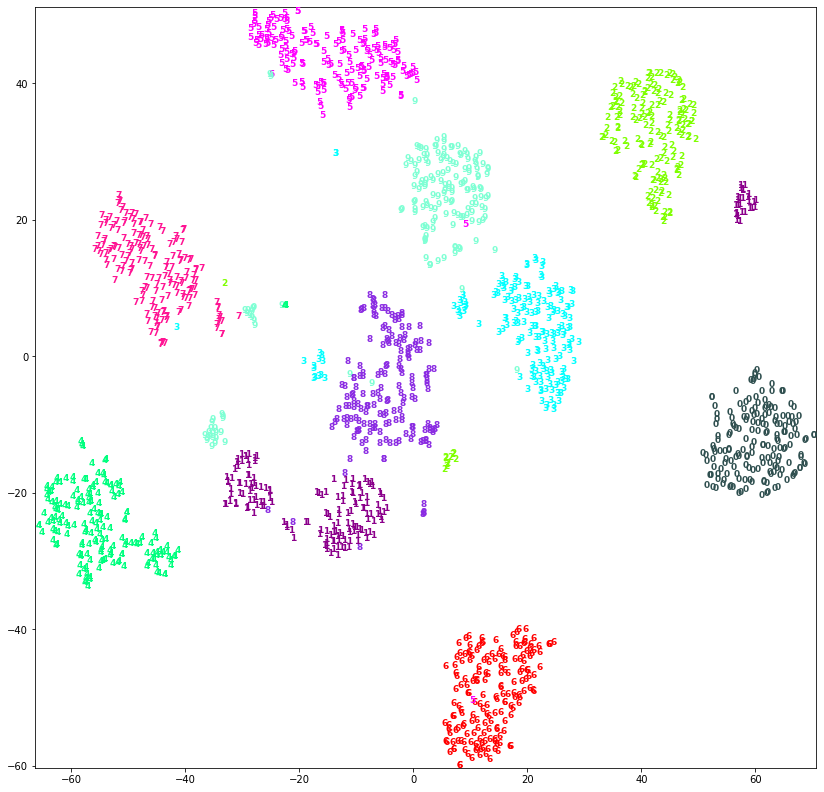

In [21]:
tsne_mnist = TSNE(random_state=42)
digits_tsne = tsne_mnist.fit_transform(digits_data.data)
display_2d_component_names(digits_tsne,(0,1,2,3,4,5,6,7,8,9),digits_data)

In [41]:
kmeans2 = KMeans(n_clusters = 10)
tsne_pred = kmeans2.fit_predict(digits_tsne)

In [42]:
cluster_accuracy(digits_data.target,tsne_pred,10)

Accuracy Score : 0.9443516972732332 
Homogeneity Score : 0.9095447125388861
Completeness Score : 0.9107778010274351


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


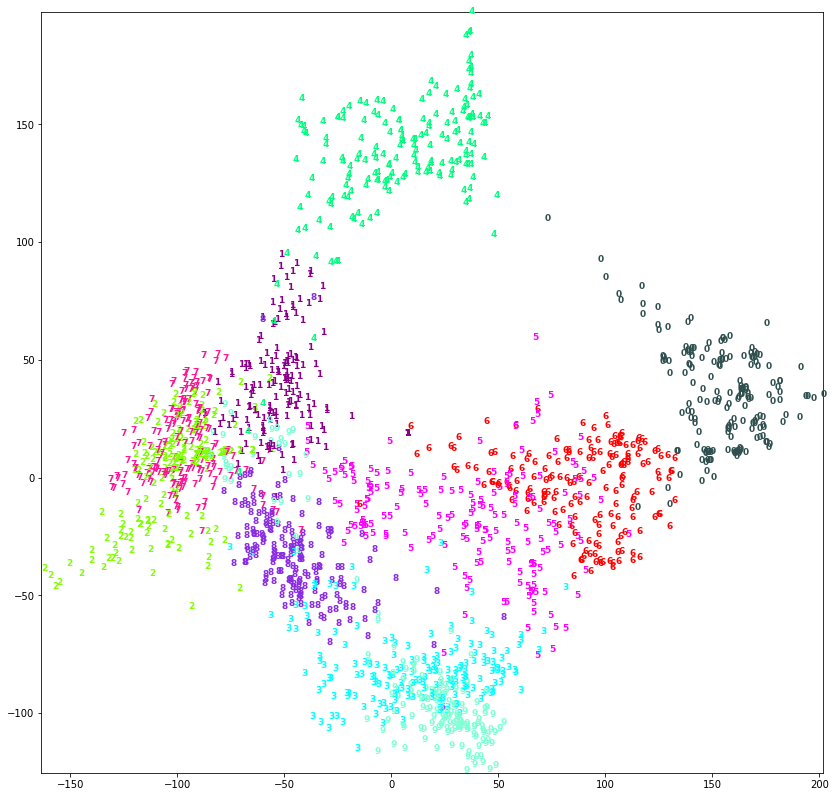

In [22]:
iso_mnist = Isomap(n_components = 2)
digits_iso = iso_mnist.fit_transform(digits_data.data)
display_2d_component_names(digits_iso,(0,1,2,3,4,5,6,7,8,9),digits_data)

In [44]:
kmeans3 = KMeans(n_clusters = 10)
iso_pred = kmeans3.fit_predict(digits_iso)

In [45]:
cluster_accuracy(digits_data.target,iso_pred,10)

Accuracy Score : 0.6939343350027825 
Homogeneity Score : 0.6852428169555176
Completeness Score : 0.7294492395949687
